In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [46]:
metadata_file = './data/META_data_consumers_1300_FLUVIUS.xlsx'
metadata_df = pd.read_excel(metadata_file, sheet_name="Blad1")

baseload = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad3.csv', header=None)
baseload.columns = range(1, baseload.shape[1] + 1)
baseload.index = range(1, len(baseload) + 1)

valid_consumer_ids = metadata_df['ID'].tolist()

file_path = './data/Fluvius load profiles type 1 consumer/Type1consumerLoad*.csv' 

result = pd.DataFrame(0, index=baseload.index, columns=baseload.columns)

# Loop through each consumer csv file
for file in glob.glob(file_path):
    consumer_id = os.path.basename(file).replace('Type1consumerLoad', '').replace('.csv', '')
    if int(consumer_id) in valid_consumer_ids:
        df = pd.read_csv(file, header=None)
        df.columns = range(1, df.shape[1] + 1)
        df.index = range(1, len(df) + 1)
        result = result.add(df)
print(result)

baseload = result

       1       2          3          4       5       6       7       8    \
1   25.972  17.557  19.438000  19.440339  22.106  20.535  19.741  21.928   
2   25.343  16.249  19.150000  17.195106  21.023  19.921  21.863  21.602   
3   25.286  16.099  18.353000  18.234874  19.462  17.241  20.638  20.717   
4   22.767  17.787  17.289000  19.037260  18.672  18.702  18.525  20.426   
5   21.876  16.913  16.797000  17.299906  17.972  17.889  18.279  20.895   
..     ...     ...        ...        ...     ...     ...     ...     ...   
92  23.988  21.717  25.334000  29.693455  25.892  30.044  26.809  25.109   
93  23.061  20.407  24.918827  26.387000  24.371  29.836  26.340  23.581   
94  22.666  21.029  23.835390  25.207000  22.263  27.190  25.961  24.093   
95  21.129  19.288  21.061059  24.209000  20.570  24.528  23.943  21.667   
96  18.657  18.342  20.211748  23.372000  19.559  20.103  22.960  19.549   

       9       10   ...        356        357        358        359  \
1   17.909  20.0

In [47]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)

# Drop the first row and column (headers)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)

# Adjust the index to start at 1
solargen.index = range(1, len(solargen) + 1)

# Drop the last column: 366 days -> 365 days
solargen = solargen.iloc[:, :-1]

In [48]:
kwp = 1
base_and_solar = baseload - (kwp * solargen)

Statistical moment 1: Mean

Year

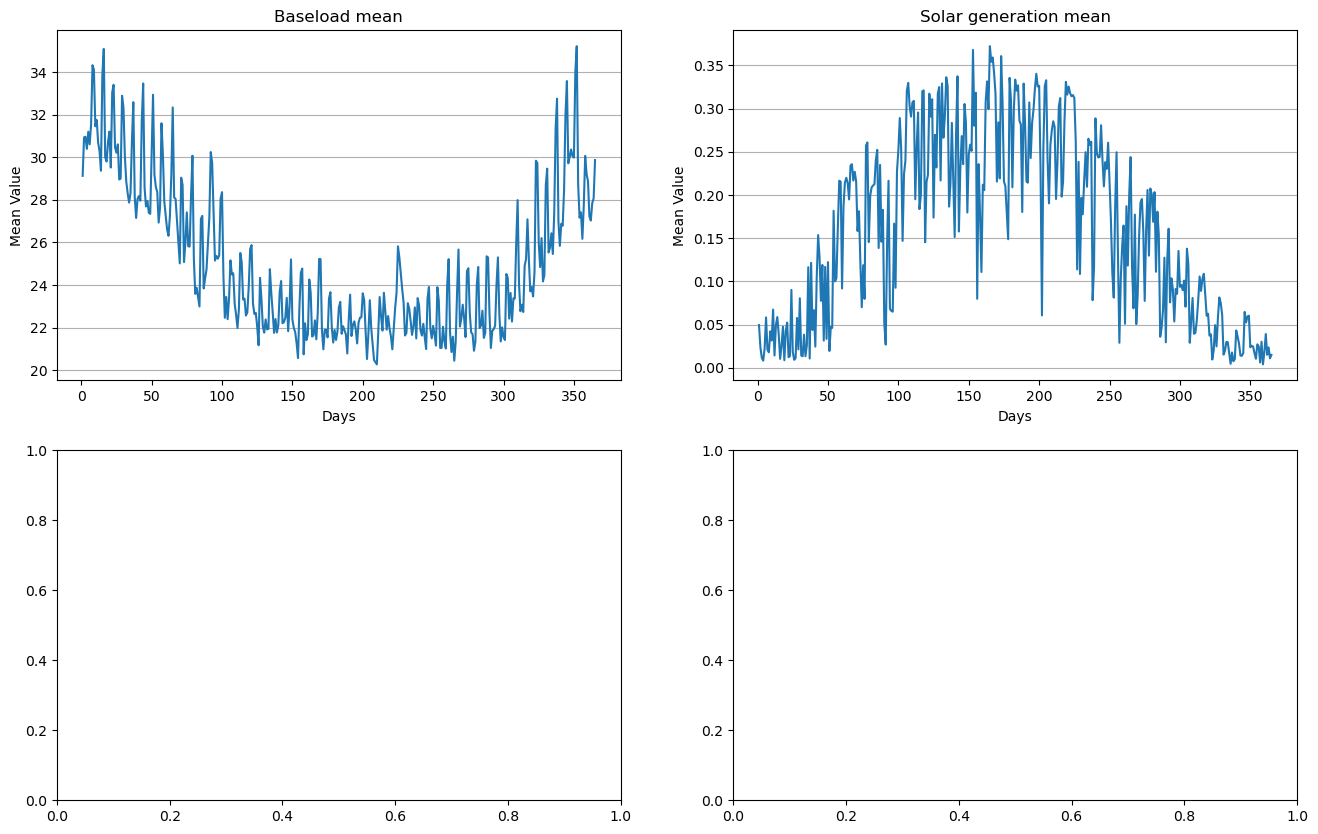

In [49]:
baseload_mean_year = baseload.mean(axis=0)
solargen_mean_year = solargen.mean(axis=0)
baseandPV_mean_year = base_and_solar.mean(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_mean_year.index, baseload_mean_year)
axs[0,0].set_title('Baseload mean')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_mean_year.index, solargen_mean_year)
axs[0,1].set_title('Solar generation mean')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

Day

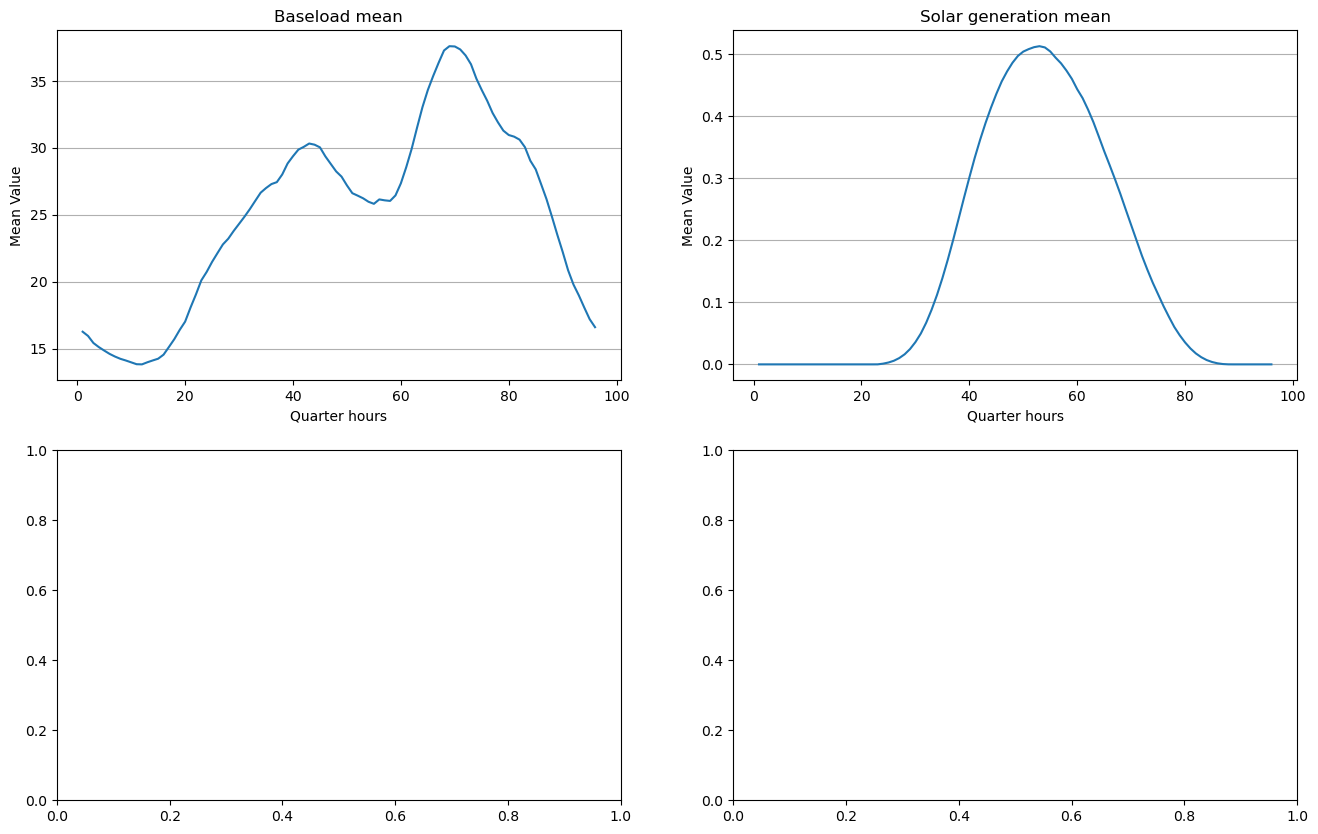

In [50]:
baseload_mean_day = baseload.mean(axis=1)
solargen_mean_day = solargen.mean(axis=1)
baseandPV_mean_day = base_and_solar.mean(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_mean_day.index, baseload_mean_day)
axs[0,0].set_title('Baseload mean')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_mean_day.index, solargen_mean_day)
axs[0,1].set_title('Solar generation mean')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

kWp sensitivity
(Gradually increase kWp)

In [51]:
kwp_values = np.arange(0, 3001, 100) 

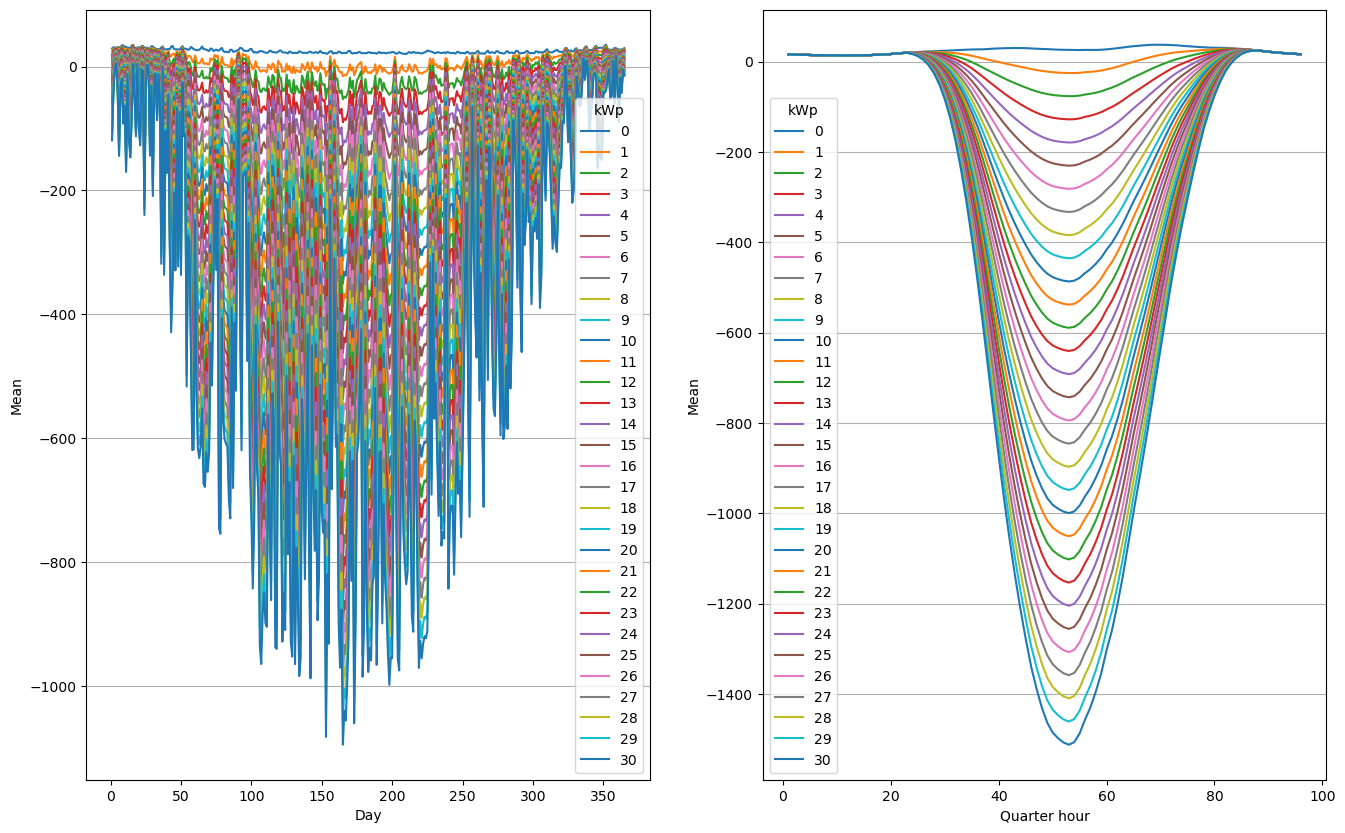

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [52]:
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and mean for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_mean = net_consumption.mean(axis=0)
    net_consumption_day_mean = net_consumption.mean(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_mean
    results_day[len(results_day.columns)] = net_consumption_day_mean

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Mean')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Mean')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 2: Variance

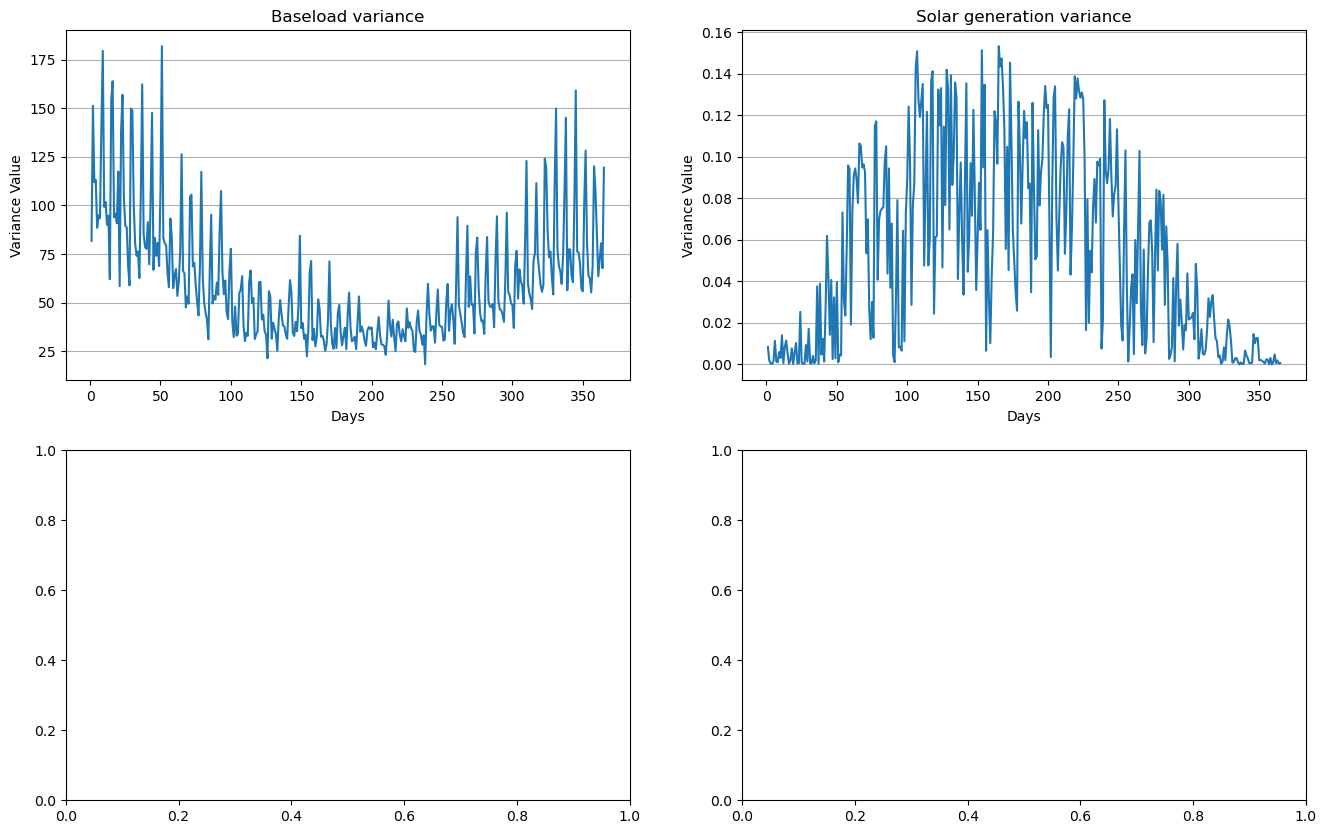

In [53]:
baseload_var_year = baseload.var(axis=0)
solargen_var_year = solargen.var(axis=0)
baseandPV_var_year = base_and_solar.var(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_var_year.index, baseload_var_year)
axs[0,0].set_title('Baseload variance')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Variance Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var_year.index, solargen_var_year)
axs[0,1].set_title('Solar generation variance')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Variance Value')
axs[0,1].grid(axis='y')


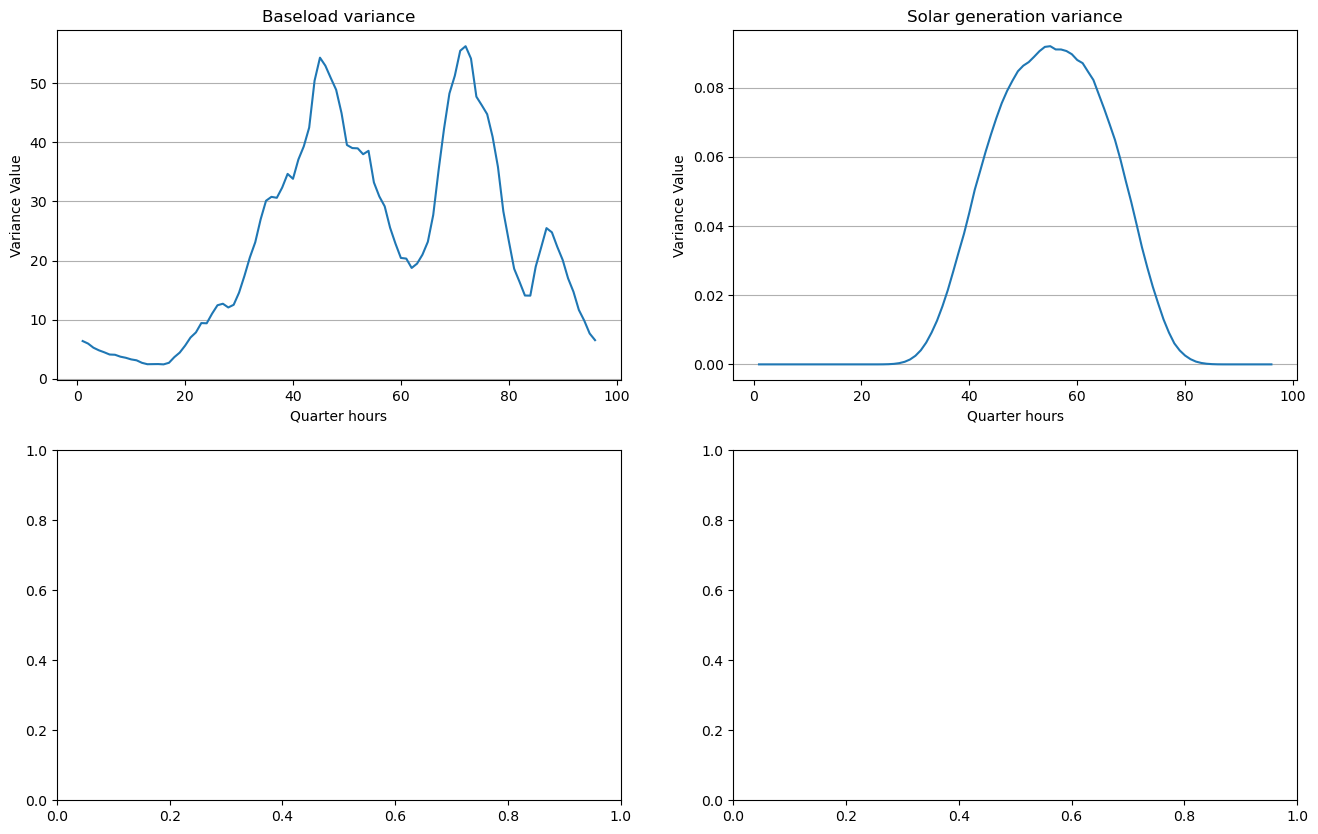

In [54]:
baseload_var_day = baseload.var(axis=1)
solargen_var_day = solargen.var(axis=1)
baseandPV_var_day = base_and_solar.var(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_var_day.index, baseload_var_day)
axs[0,0].set_title('Baseload variance')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Variance Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var_day.index, solargen_var_day)
axs[0,1].set_title('Solar generation variance')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Variance Value')
axs[0,1].grid(axis='y')

kWp sensitivity
(Gradually increase kWp)

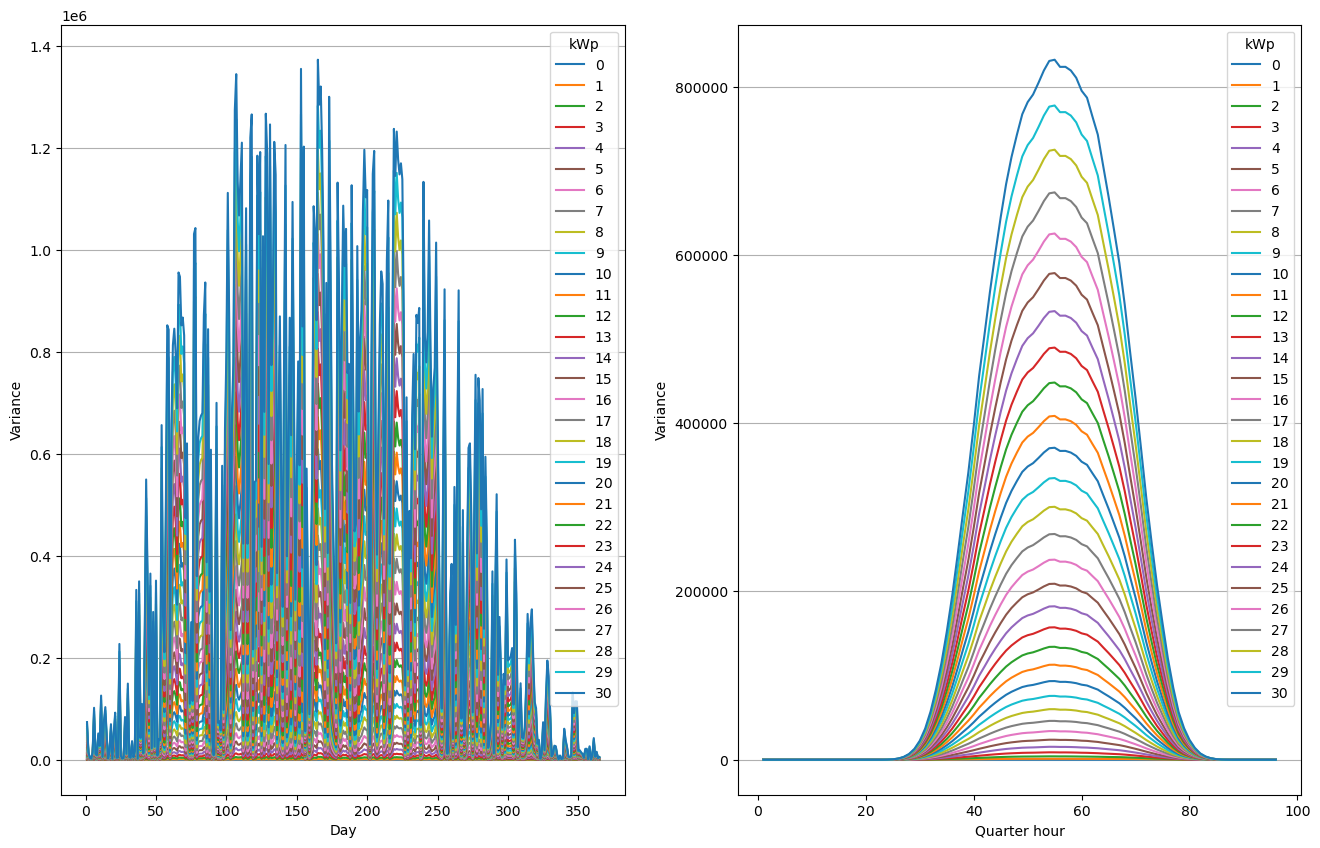

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [55]:
kwp_values = np.arange(0,3001, 100)

results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and variance for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_var = net_consumption.var(axis=0)
    net_consumption_day_var = net_consumption.var(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_var
    results_day[len(results_day.columns)] = net_consumption_day_var

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Variance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Variance')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 3: Skewness

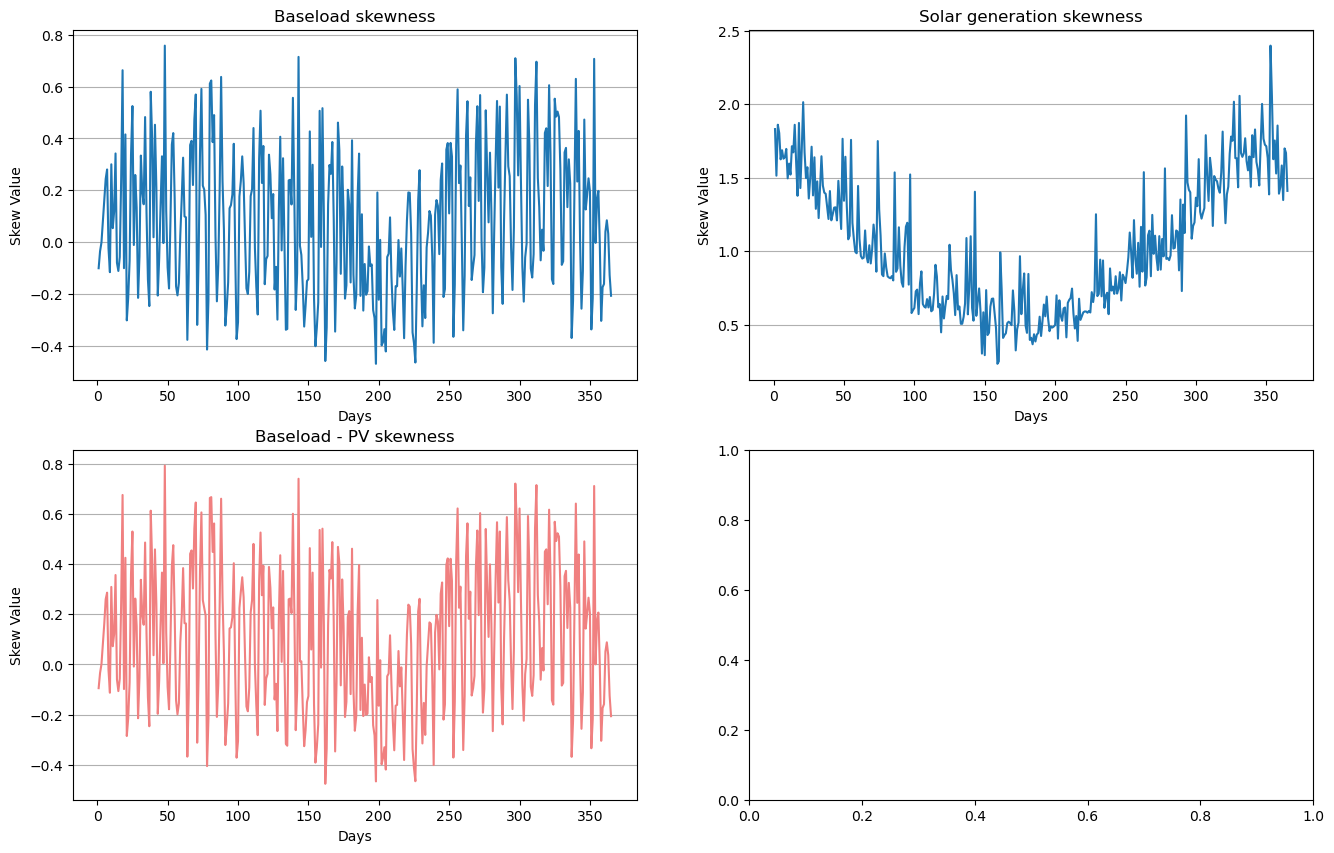

In [56]:
baseload_skew_year = baseload.skew(axis=0)
solargen_skew_year = solargen.skew(axis=0)
baseandPV_skew_year = base_and_solar.skew(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_skew_year.index, baseload_skew_year)
axs[0,0].set_title('Baseload skewness')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Skew Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_skew_year.index, solargen_skew_year)
axs[0,1].set_title('Solar generation skewness')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Skew Value')
axs[0,1].grid(axis='y')

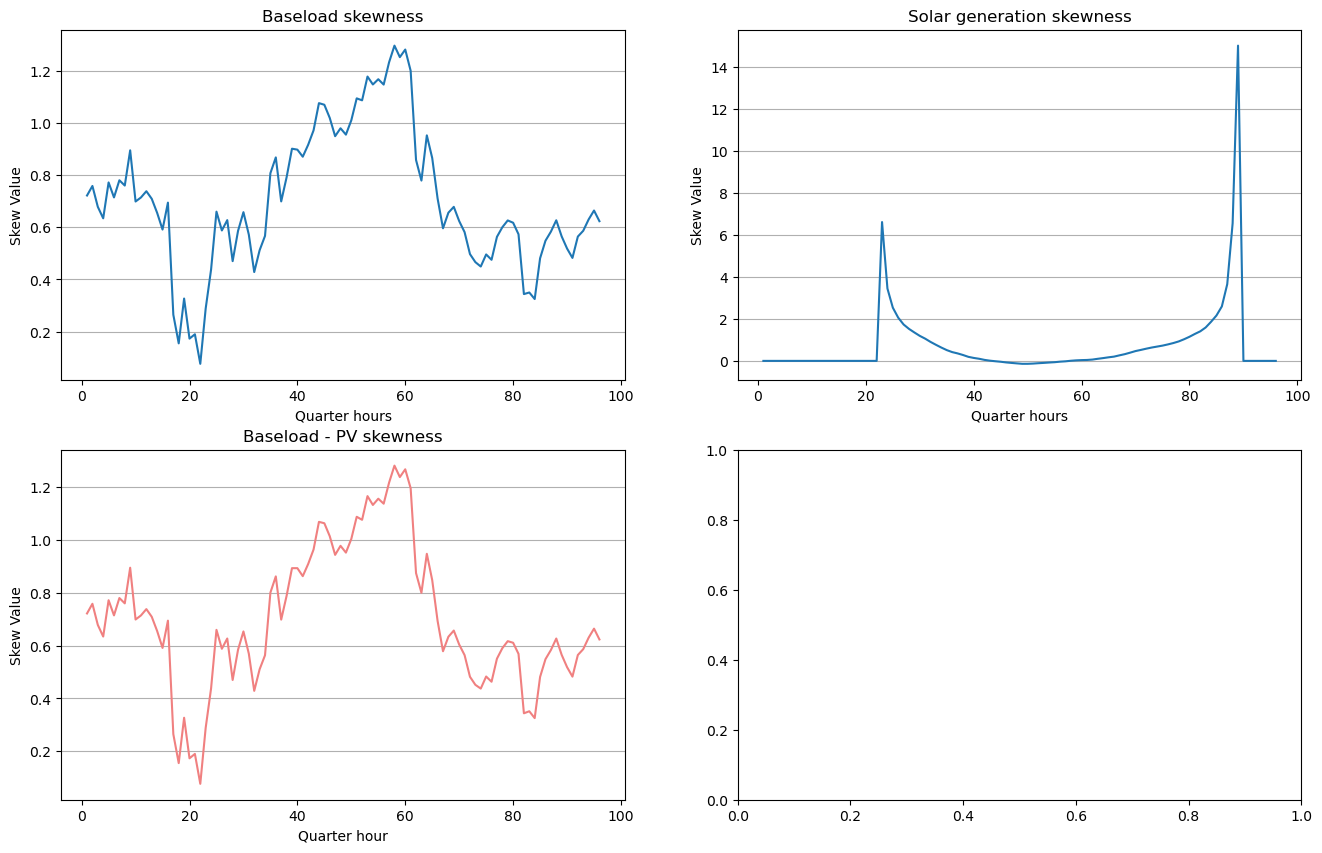

In [57]:
baseload_skew_day = baseload.skew(axis=1)
solargen_skew_day = solargen.skew(axis=1)
baseandPV_skew_day = base_and_solar.skew(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_skew_day.index, baseload_skew_day)
axs[0,0].set_title('Baseload skewness')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Skew Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_skew_day.index, solargen_skew_day)
axs[0,1].set_title('Solar generation skewness')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Skew Value')
axs[0,1].grid(axis='y')

kWp sensitivity
(Gradually increase kWp)

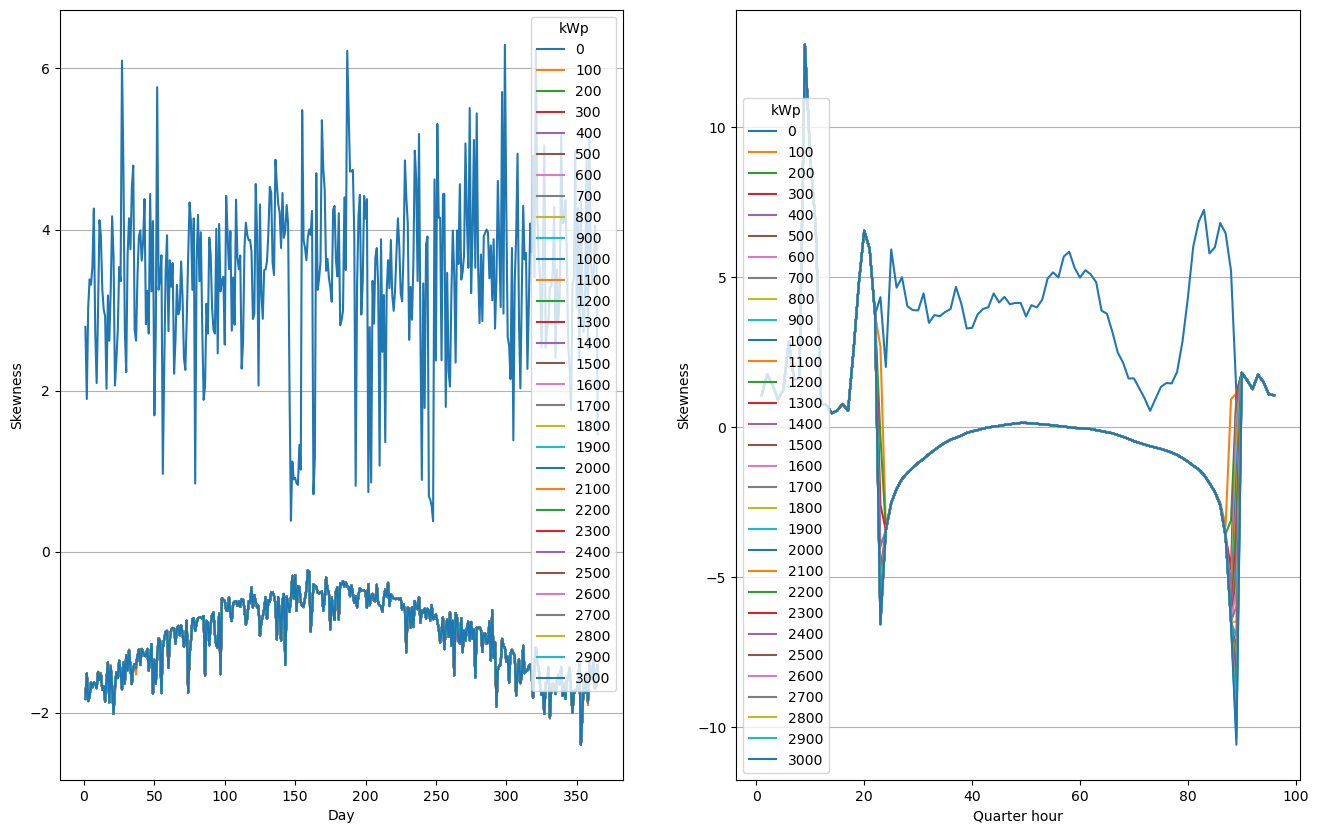

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [68]:
kwp_values = np.arange(0, 3001, 100)
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and skewness for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_skew = net_consumption.skew(axis=0)
    net_consumption_day_skew = net_consumption.skew(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_skew
    results_day[len(results_day.columns)] = net_consumption_day_skew

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp*100)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Skewness')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp*100)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Skewness')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 4: Kurtosis

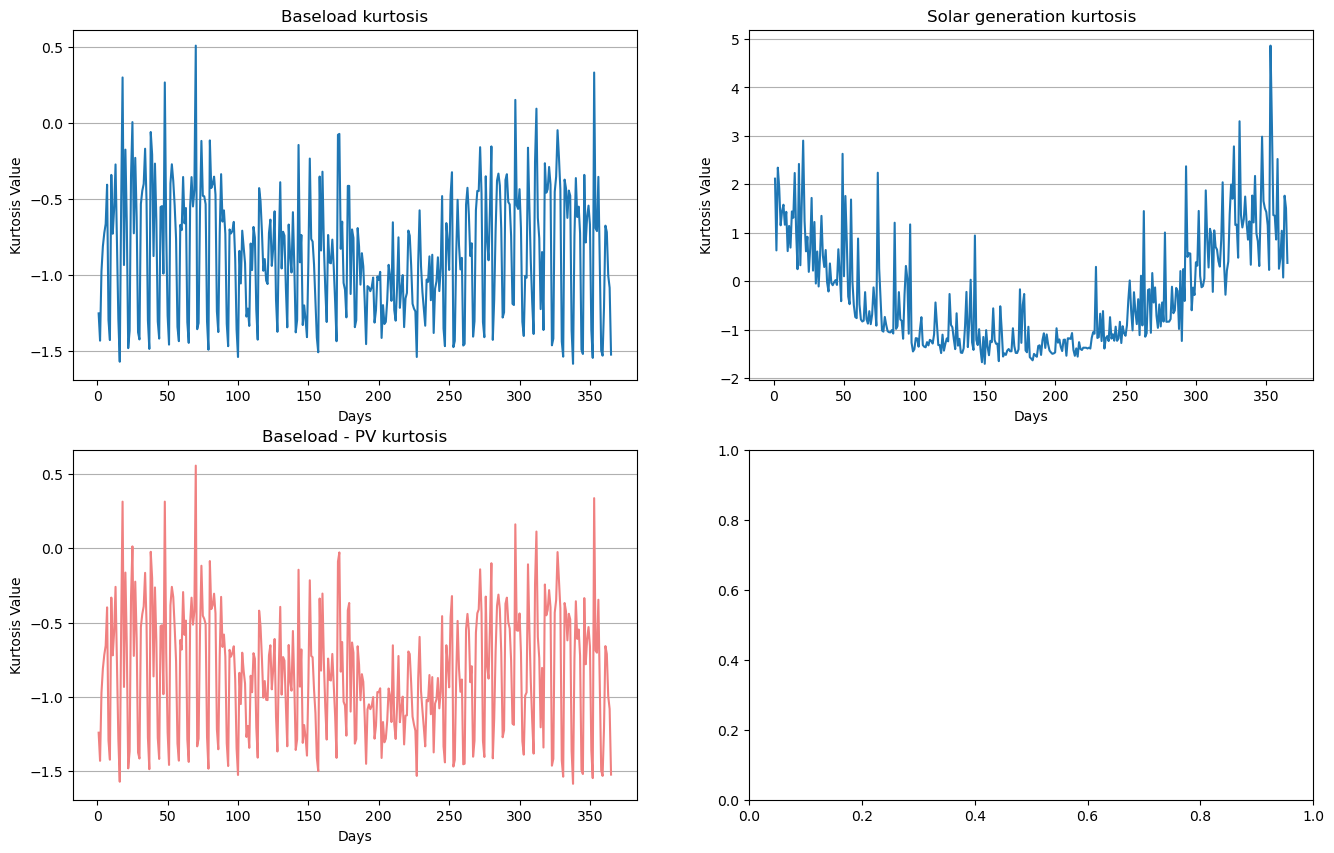

In [59]:
baseload_kurt_year = baseload.kurt(axis=0)
solargen_kurt_year = solargen.kurt(axis=0)
baseandPV_kurt_year = base_and_solar.kurt(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_kurt_year.index, baseload_kurt_year)
axs[0,0].set_title('Baseload kurtosis')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Kurtosis Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_kurt_year.index, solargen_kurt_year)
axs[0,1].set_title('Solar generation kurtosis')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Kurtosis Value')
axs[0,1].grid(axis='y')

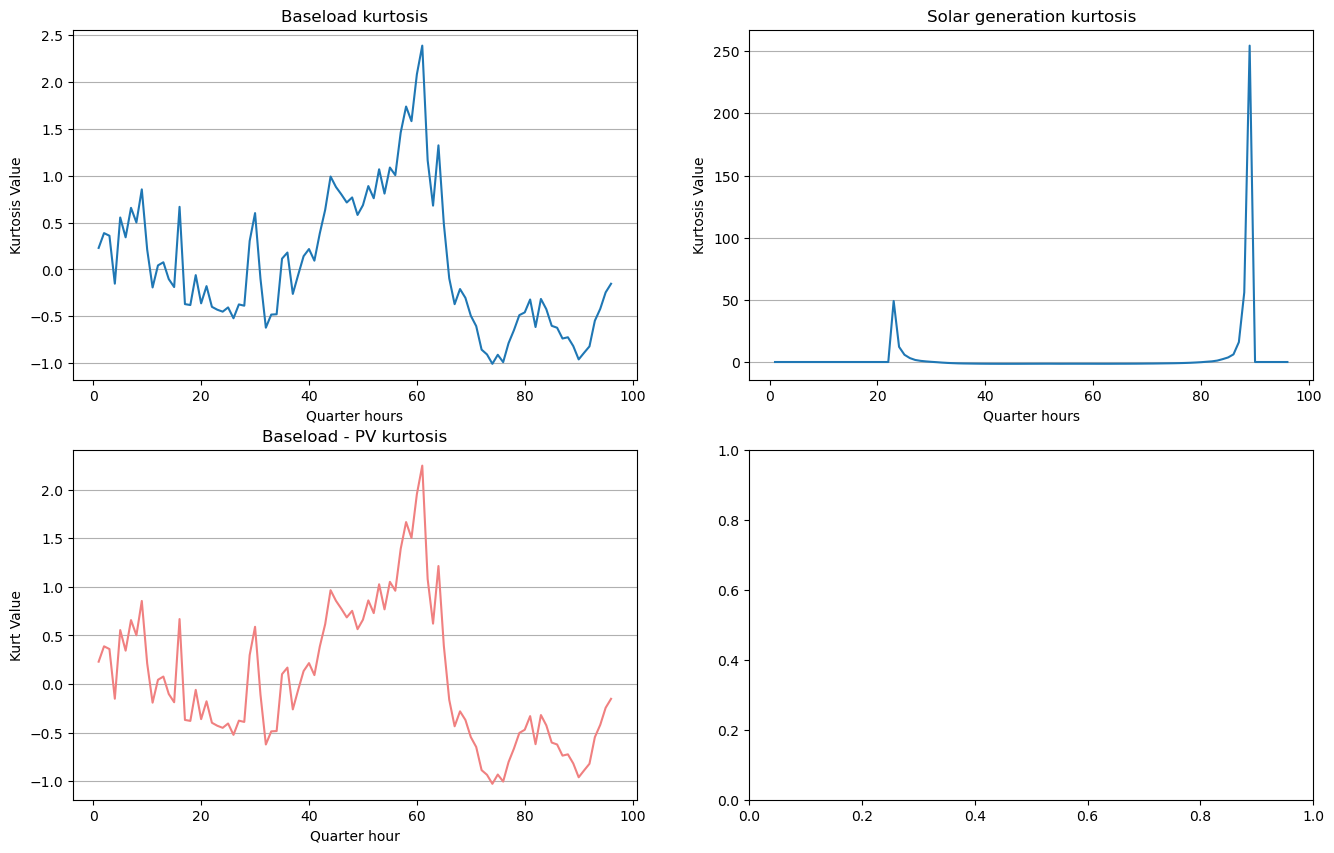

In [60]:
baseload_kurt_day = baseload.kurt(axis=1)
solargen_kurt_day = solargen.kurt(axis=1)
baseandPV_kurt_day = base_and_solar.kurt(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_kurt_day.index, baseload_kurt_day)
axs[0,0].set_title('Baseload kurtosis')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Kurtosis Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_kurt_day.index, solargen_kurt_day)
axs[0,1].set_title('Solar generation kurtosis')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Kurtosis Value')
axs[0,1].grid(axis='y')

kWp sensitivity (Gradually increase kWp)

[   0  300  600  900 1200 1500 1800 2100 2400 2700 3000]


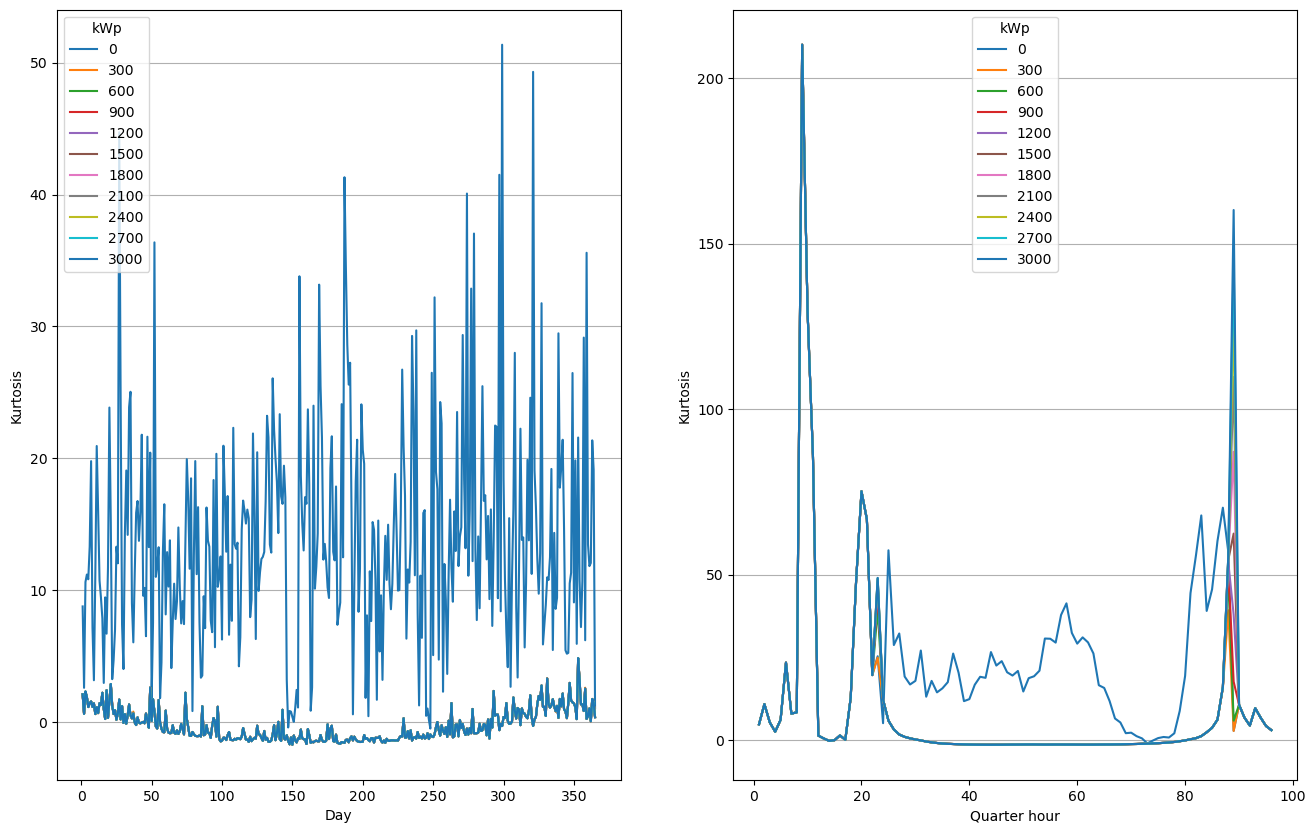

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [76]:
kwp_values = np.arange(0, 3001, 300)
print(kwp_values)
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and kurtosis for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_kurt = net_consumption.kurt(axis=0)
    net_consumption_day_kurt = net_consumption.kurt(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_kurt
    results_day[len(results_day.columns)] = net_consumption_day_kurt

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp*300)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Kurtosis')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp*300)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Kurtosis')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()